In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [8]:
features=df[['Aboard','Fatalities']]

In [11]:

features = features.dropna()

In [12]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

In [13]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_features)
  wcss.append(kmeans.inertia_)

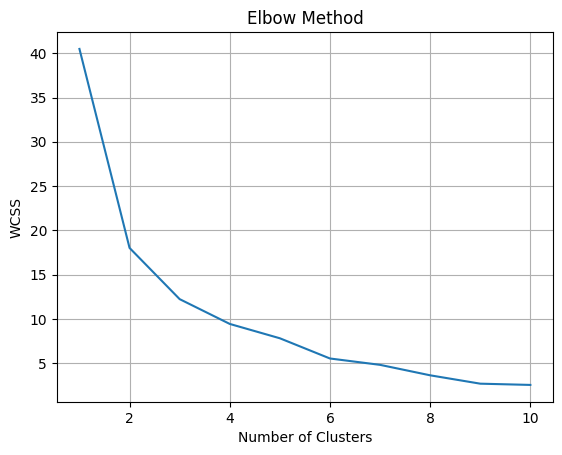

In [15]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3,random_state=42)
clusters=kmeans.fit_predict(scaled_features)

In [21]:
features['Cluster'] = clusters
df = df.merge(features['Cluster'], left_index=True, right_index=True, how='left')

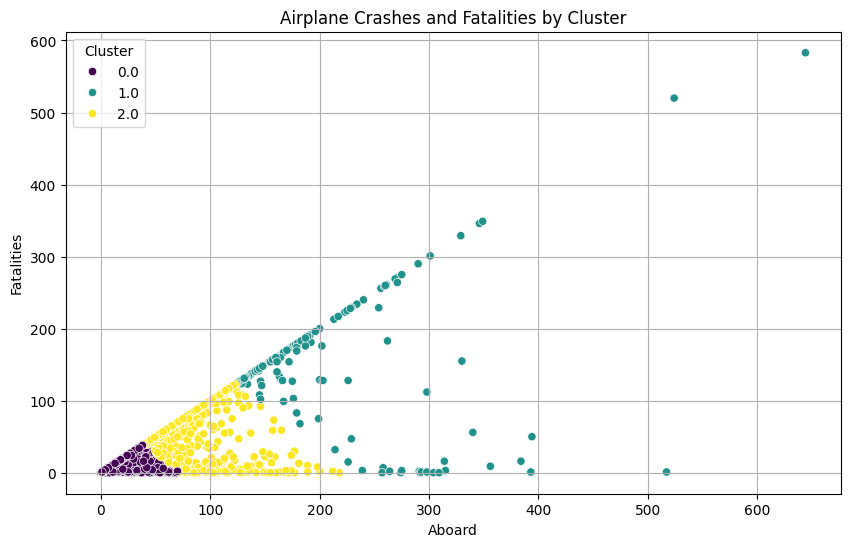

In [26]:
# Drop the extra 'Cluster' columns that resulted from the merge
df = df.drop(columns=['Cluster_x', 'Cluster_y'], errors='ignore')

# Merge the 'Cluster' column from the features DataFrame back into the original DataFrame
df = df.merge(features['Cluster'], left_index=True, right_index=True, how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aboard', y='Fatalities', hue='Cluster', data=df, palette='viridis')
plt.title('Airplane Crashes and Fatalities by Cluster')
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.grid(True)
plt.show()